### 작업_데이터로드
- 텐서플로우 데이터셋에서 제공하는 fashion_mnist자료를 불러서 x,y데이터에 분배하기
- 패션MNIST는 10개의 카테고리의 패션상품 28,28의 흑백이미지임, 손글씨보다 모델인식률이 나쁨
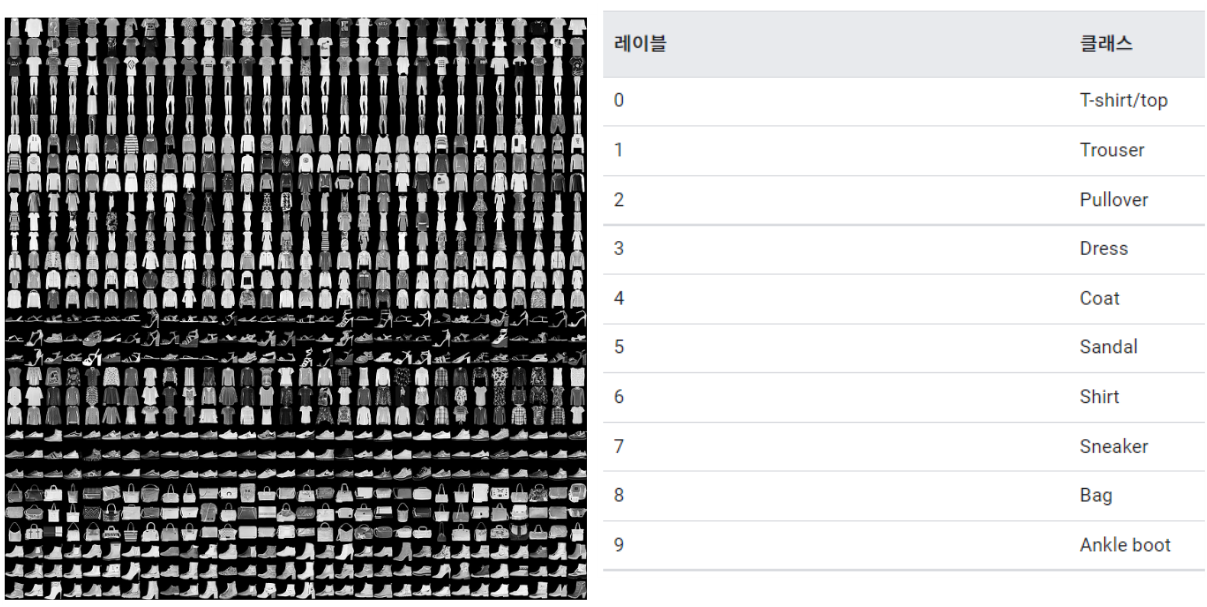


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

In [31]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### [미션1] 데이터정보확인

- [미션1-1] 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다
- 결과는 
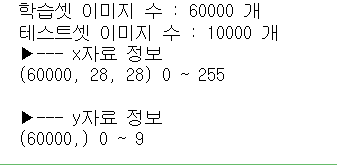

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
▶--- x자료 정보
(60000, 28, 28) 0 ~ 255

▶--- y자료 정보
(60000,) 0 ~ 9


- [미션1-2] 첫 번째 이미지를 확인해 봅시다.
- 결과
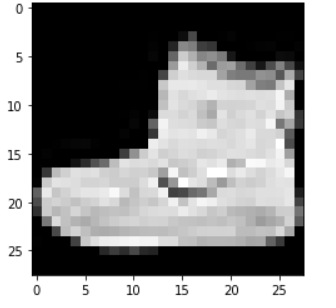

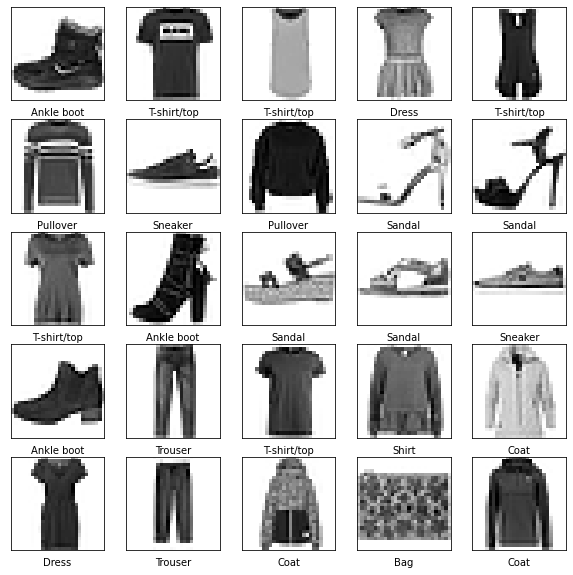

In [34]:
### 샘플 출력물
### 실행하여 결과를 확인하여 봅니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### [미션2] 모델에 넣을 데이터 변환

- 미션2-1,  
- X_train, X_test를  60000, 28,28,1과 10000,28,28,1 로 변환하고 
    - 두자료를 /255로 나눔
- X_train, X_test의 쉐이프와 최소, 최대값 출력해봄
- y값은 원핫인코딩함
- 출력값
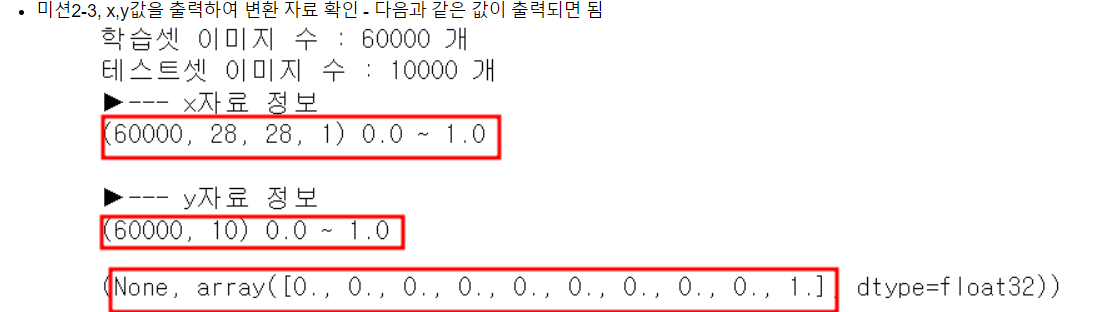

### [미션3] CNN모델제작
- ★ 표시있는곳 코드 완성

In [43]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=( ★              )))      # input_shape 설정함
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(★, activation=★)) # 최종 output값 설정


# 모델의 실행 옵션을 설정합니다.
model.compile(loss=★,             # loss값 지정
            
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './data/model/'  # 폴더없어도 알아서 생성됨
modelpath="./data/model/fashionMNIST_CNN.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss',       # val_loss값을 기준으로
                               verbose=1,                # 실행결과를 화면에 출력함. verbose=0하면 실행결과가 화면에 나타나지않음
                               save_best_only=True)  # 가장좋은(즉 loss숫자가 가장 낮은) 모델을 저장함

early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10) # 실행하다가 10번이상 더 좋은 결과가 없으면 중단,여기서는 epochs를3으로해서 의미없음.

# 모델을 실행합니다.
history = model.fit(★, ★, validation_split=0.25, 
                    epochs=5, batch_size=32, 
                    verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.38060, saving model to ./data/model\fashionMNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.38060 to 0.34891, saving model to ./data/model\fashionMNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.34891 to 0.29557, saving model to ./data/model\fashionMNIST_CNN.hdf5

Epoch 4: val_loss did not improve from 0.29557

Epoch 5: val_loss improved from 0.29557 to 0.26859, saving model to ./data/model\fashionMNIST_CNN.hdf5
313/313 [==============================] - 1s 4ms/step - loss: 0.2755 - accuracy: 0.9009

 Test Accuracy: 0.9009


### [미션4] CNN모델 그래프 그리기

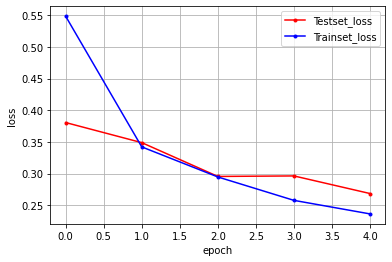